In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet50_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Reprocess
data_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.171, ECE: 0.023
Optimal temperature: 0.993
After temperature - NLL: 1.171, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8235 ± 0.0026
Final Average Prediction Set Size: 6.46 ± 0.09
Final Average Coverage: 0.7998 ± 0.0055
Final Average Real Probability: 0.6648 ± 0.0055


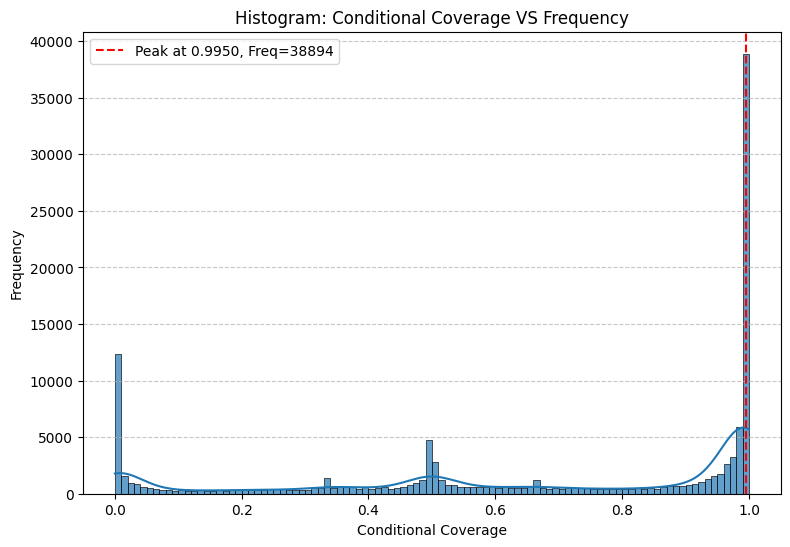

38894 (31.28%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8411 ± 0.0031
Final Average Prediction Set Size: 2.88 ± 0.02
Final Average Coverage: 0.7993 ± 0.0056
Final Average Real Probability: 0.6478 ± 0.0054


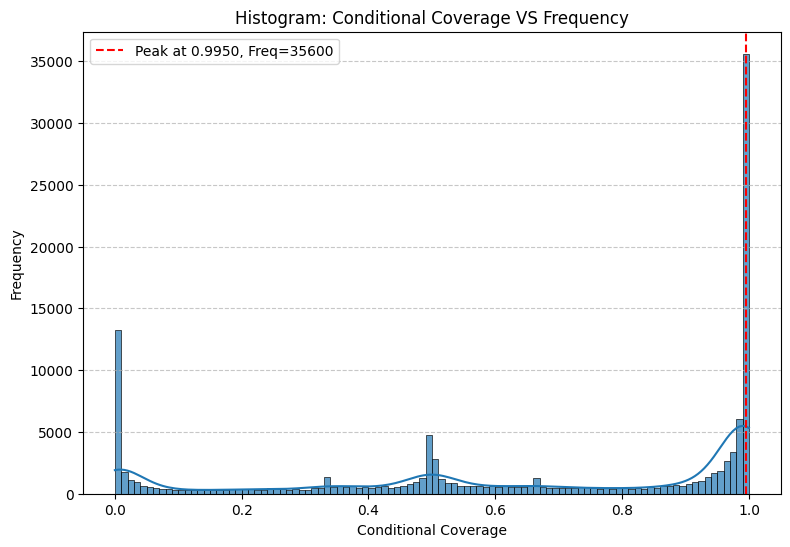

35600 (28.63%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8303 ± 0.0041
Final Average Prediction Set Size: 2.39 ± 0.02
Final Average Coverage: 0.7997 ± 0.0056
Final Average Real Probability: 0.6595 ± 0.0048


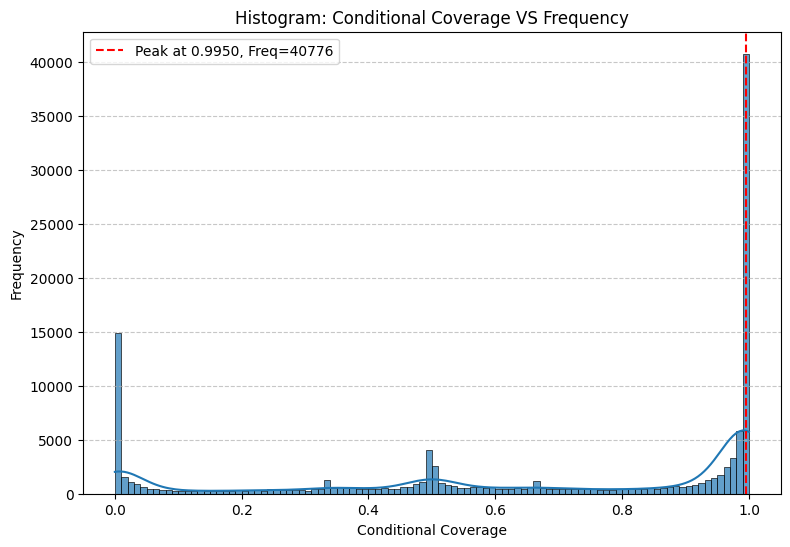

40776 (32.79%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8230 ± 0.0026
Final Average Prediction Set Size: 6.51 ± 0.12
Final Average Coverage: 0.7993 ± 0.0054
Final Average Real Probability: 0.6659 ± 0.0053


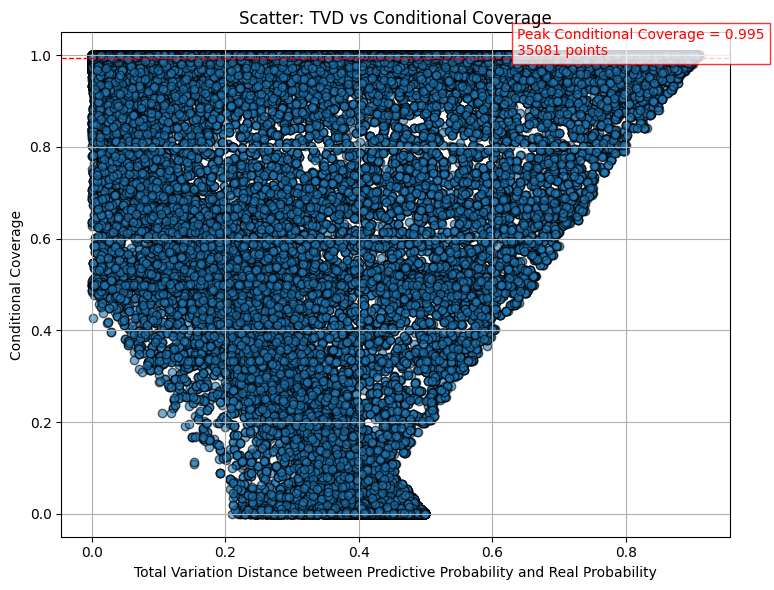

Peak Conditional Coverage = 0.995, with 35081 samples

=== Count Regions Summary ===
37435 (30.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
22470 (18.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
57084 (45.9%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.78166']
  Real Probability Set      : ['0.87305']
Sample 2:
  Predictive Probability Set: ['0.99544']
  Real Probability Set      : ['0.81438']
Sample 3:
  Predictive Probability Set: ['0.98594']
  Real Probability Set      : ['0.99584']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.78643', '0.03357']
  Real Probability Set      : ['0.04246', '0.00020']
Sample 2:
  Predictive Probability Set: ['0.96591']
  Real Probability Set      : ['0.00552']
Sample 3:
  Predictive Probability Set: ['0.54470', '0.22627', '0.19236']
  Real Probability Set      : ['0.00052

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8415 ± 0.0031
Final Average Prediction Set Size: 2.89 ± 0.03
Final Average Coverage: 0.7996 ± 0.0054
Final Average Real Probability: 0.6496 ± 0.0055


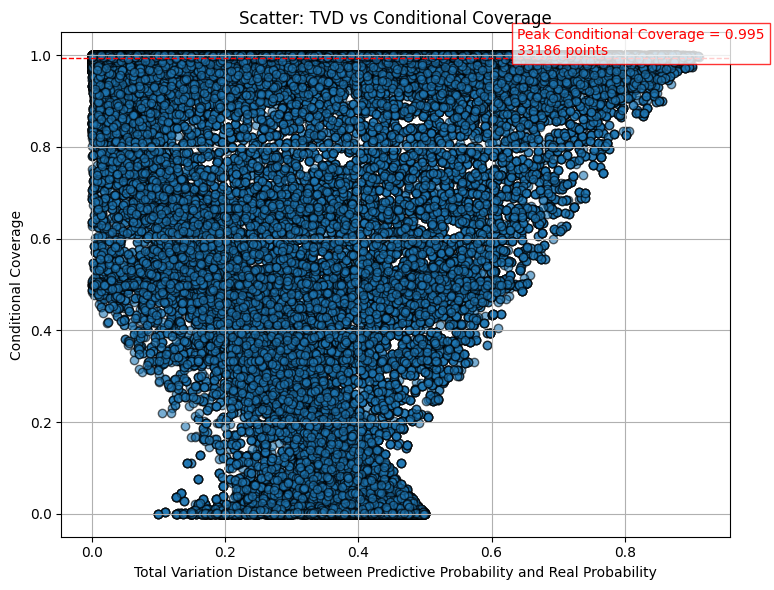

Peak Conditional Coverage = 0.995, with 33186 samples

=== Count Regions Summary ===
39375 (31.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
19455 (15.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
60255 (48.5%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98217']
  Real Probability Set      : ['0.99518']
Sample 2:
  Predictive Probability Set: ['0.41098', '0.36584']
  Real Probability Set      : ['0.59018', '0.35248']
Sample 3:
  Predictive Probability Set: ['0.49153', '0.37645']
  Real Probability Set      : ['0.50114', '0.49867']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.72713', '0.10941']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.95645']
  Real Probability Set      : ['0.00293']
Sample 3:
  Predictive Probability Set: ['0.88589']
  Real Probabilit

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8305 ± 0.0043
Final Average Prediction Set Size: 2.39 ± 0.02
Final Average Coverage: 0.8008 ± 0.0054
Final Average Real Probability: 0.6618 ± 0.0049


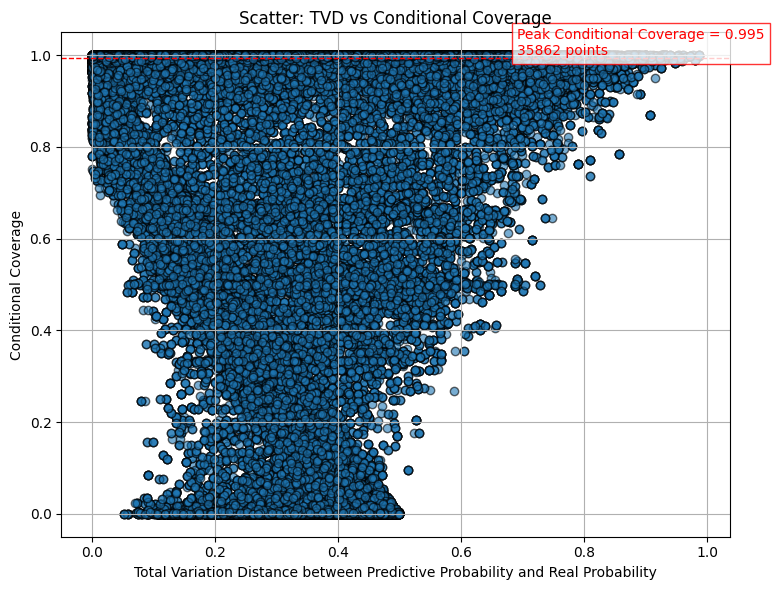

Peak Conditional Coverage = 0.995, with 35862 samples

=== Count Regions Summary ===
41439 (33.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
19075 (15.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
56196 (45.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95605']
  Real Probability Set      : ['0.99389']
Sample 2:
  Predictive Probability Set: ['0.98731']
  Real Probability Set      : ['0.99428']
Sample 3:
  Predictive Probability Set: ['0.77408', '0.09544']
  Real Probability Set      : ['0.92418', '0.06746']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.96865']
  Real Probability Set      : ['0.06003']
Sample 2:
  Predictive Probability Set: ['0.83742']
  Real Probability Set      : ['0.02277']
Sample 3:
  Predictive Probability Set: ['0.26597', '0.23271', '0.09141', '0.06973', '0.05052', '0.03552']
  Real

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)